## Mini project using probability conecpts learned

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t
from scipy import stats as scistats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


In [2]:
df = sns.load_dataset("tips")  # columns: total_bill, tip, sex, smoker, day, time, size
print("Dataset loaded. Shape:", df.shape)
df.head()

Dataset loaded. Shape: (244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## EDA & Summary Stats

In [5]:
print("Summary (describe)")
print()
display(df.describe(include='all'))

print("Value counts for categorical columns")
print()
for col in ["sex", "smoker", "day", "time"]:
    print(f"\n{col}:\n", df[col].value_counts())

# Numeric summary for key columns
num_cols = ["total_bill", "tip", "size"]
print("numeric summary (mean, median, std)")
print()
for col in num_cols:
    print(f"{col}: mean={df[col].mean():.3f}, median={df[col].median():.3f}, std={df[col].std():.3f}")


Summary (describe)



,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


Value counts for categorical columns


sex:
 sex
Male      157
Female     87
Name: count, dtype: int64

smoker:
 smoker
No     151
Yes     93
Name: count, dtype: int64

day:
 day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

time:
 time
Dinner    176
Lunch      68
Name: count, dtype: int64
numeric summary (mean, median, std)

total_bill: mean=19.786, median=17.795, std=8.902
tip: mean=2.998, median=2.900, std=1.384
size: mean=2.570, median=2.000, std=0.951


## Visualizations: distributions & boxplots

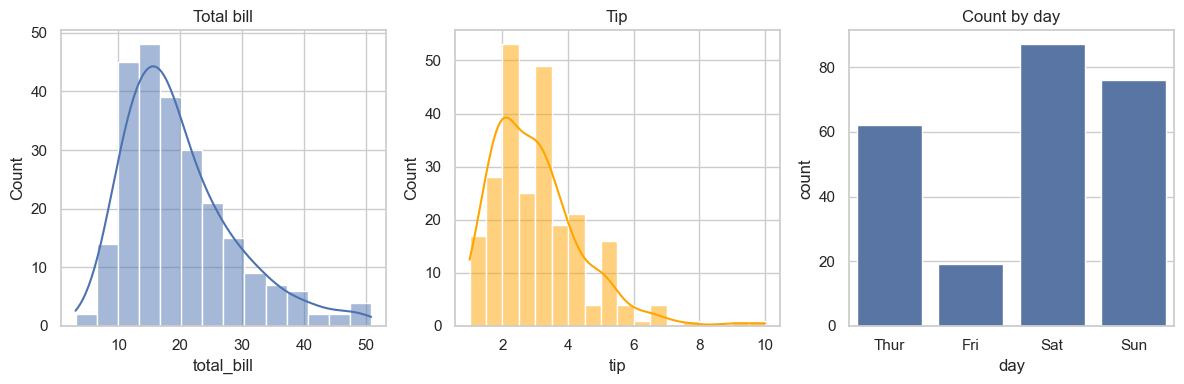

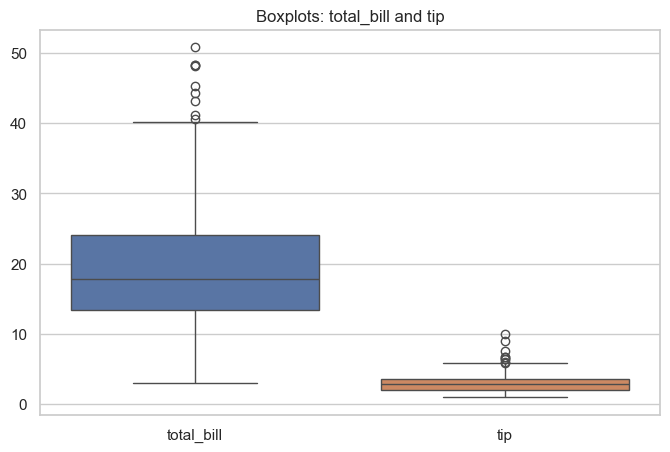

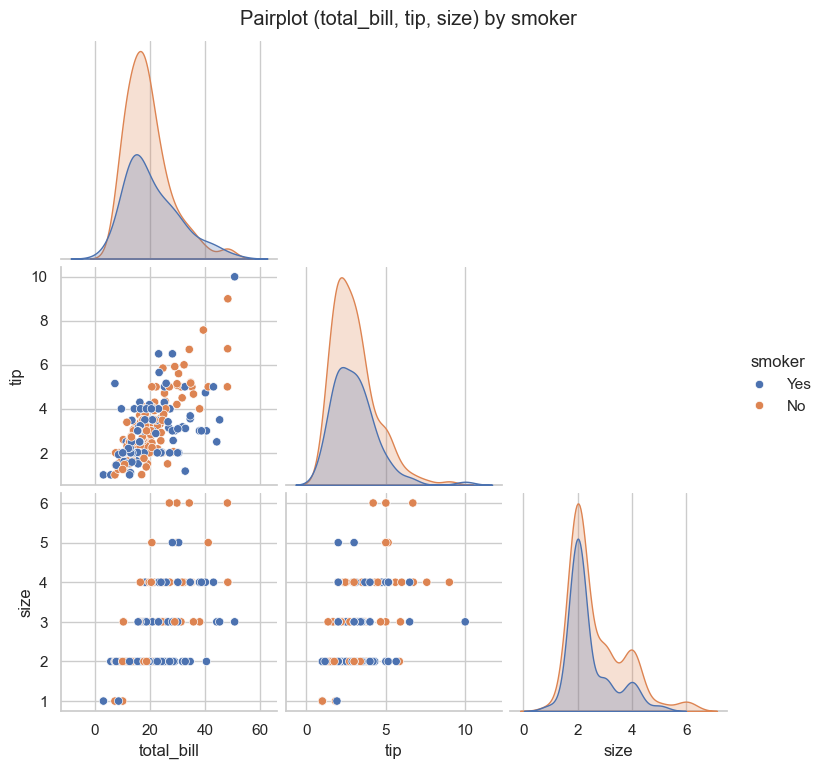

In [6]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(df["total_bill"], kde=True)
plt.title("Total bill")

plt.subplot(1,3,2)
sns.histplot(df["tip"], kde=True, color="orange")
plt.title("Tip")

plt.subplot(1,3,3)
sns.countplot(x="day", data=df)
plt.title("Count by day")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df[["total_bill","tip"]])
plt.title("Boxplots: total_bill and tip")
plt.show()

# Pairplot to inspect relationships 
sns.pairplot(df, vars=["total_bill", "tip", "size"], hue="smoker", corner=True)
plt.suptitle("Pairplot (total_bill, tip, size) by smoker", y=1.02)
plt.show()

## Correlation

Correlation matrix:
             total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


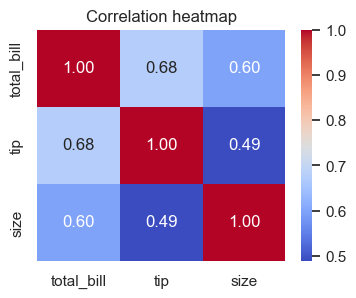

Pearson correlation between total_bill and tip: r=0.676, p-value=0.0000
Linear fit tip = 0.920 + 0.105 * total_bill (r=0.676)


In [7]:
corr = df[["total_bill", "tip", "size"]].corr()
print("Correlation matrix:\n", corr)
plt.figure(figsize=(4,3))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

# Correlation test between total_bill and tip
r, pval = stats.pearsonr(df["total_bill"], df["tip"])
print(f"Pearson correlation between total_bill and tip: r={r:.3f}, p-value={pval:.4f}")

# Simple linear regression check (slope)
slope, intercept, r_value, p_value, std_err = stats.linregress(df["total_bill"], df["tip"])
print(f"Linear fit tip = {intercept:.3f} + {slope:.3f} * total_bill (r={r_value:.3f})")

## Outlier Detection
- IQR method per numeric column
- Z-score method (abs(z)>3)


In [8]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_iqr = (df[num_cols] < lower) | (df[num_cols] > upper)
print("Outlier counts by IQR (per column):")
print(outliers_iqr.sum())

# Z-score method
z_scores = np.abs(stats.zscore(df[num_cols]))
outliers_z = (z_scores > 3)
print("Outlier counts by Z-score (per column):")
print(outliers_z.sum(axis=0))

# Show rows that are outliers by any method
outlier_rows = df[(outliers_iqr.any(axis=1)) | (outliers_z.any(axis=1))]
print(f"Total rows flagged as outliers (IQR or Z): {outlier_rows.shape[0]}")
outlier_rows.head()

Outlier counts by IQR (per column):
total_bill    9
tip           9
size          9
dtype: int64
Outlier counts by Z-score (per column):
[4 3 4]
Total rows flagged as outliers (IQR or Z): 21


,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
125,29.80,4.20,Female,No,Thur,Lunch,6


## Sampling recap: LLN & CLT demos (total_bill)

Population mean (total_bill): 19.786, population std: 8.884


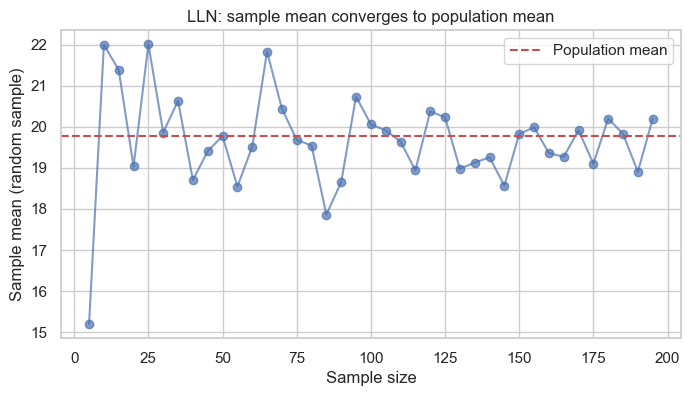

In [9]:
population = df["total_bill"].values
pop_mean = population.mean()
pop_std = population.std(ddof=0)
print(f"Population mean (total_bill): {pop_mean:.3f}, population std: {pop_std:.3f}")

# Law of Large Numbers: sample mean convergence
sample_sizes = np.arange(5, 200, 5)
means_by_n = [np.mean(np.random.choice(population, size=n, replace=True)) for n in sample_sizes]

plt.figure(figsize=(8,4))
plt.plot(sample_sizes, means_by_n, marker="o", alpha=0.7)
plt.axhline(pop_mean, color='r', linestyle='--', label="Population mean")
plt.xlabel("Sample size")
plt.ylabel("Sample mean (random sample)")
plt.title("LLN: sample mean converges to population mean")
plt.legend()
plt.show()

## Confidence Intervals for mean (t-based)
- Example for 'tip' mean

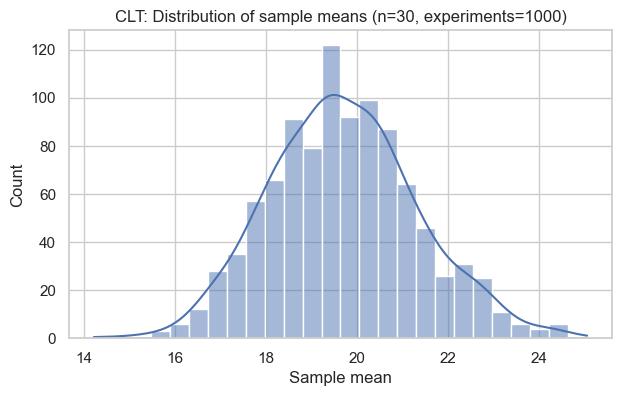

Sample means mean=19.708, std=1.631
Theoretical SE ≈ 1.622


In [10]:
n = 30
n_experiments = 1000
sample_means = [np.mean(np.random.choice(population, size=n, replace=True)) for _ in range(n_experiments)]

plt.figure(figsize=(7,4))
sns.histplot(sample_means, kde=True)
plt.title(f"CLT: Distribution of sample means (n={n}, experiments={n_experiments})")
plt.xlabel("Sample mean")
plt.show()

print(f"Sample means mean={np.mean(sample_means):.3f}, std={np.std(sample_means, ddof=1):.3f}")
print(f"Theoretical SE ≈ {pop_std/np.sqrt(n):.3f}")

In [ ]:
def t_confidence_interval(data, confidence=0.95):
    a = np.array(data)
    n = len(a)
    mean = a.mean()
    se = a.std(ddof=1) / np.sqrt(n)
    h = se * t.ppf((1 + confidence) / 2., n - 1)
    return mean, mean - h, mean + h

mean_tip, lo_tip, hi_tip = t_confidence_interval(df["tip"], 0.95)
print(f"Tip mean: {mean_tip:.3f}, 95% t-CI: ({lo_tip:.3f}, {hi_tip:.3f})")

# Bootstrap CI for mean 
def bootstrap_ci(data, statfunc=np.mean, n_boot=2000, ci=95):
    boot_stats = []
    n = len(data)
    for _ in range(n_boot):
        sample = np.random.choice(data, size=n, replace=True)
        boot_stats.append(statfunc(sample))
    lower = np.percentile(boot_stats, (100-ci)/2)
    upper = np.percentile(boot_stats, 100 - (100-ci)/2)
    return np.mean(boot_stats), lower, upper

boot_mean, boot_lo, boot_hi = bootstrap_ci(df["tip"].values, np.mean, n_boot=2000, ci=95)
print(f"Bootstrap mean: {boot_mean:.3f}, 95% CI: ({boot_lo:.3f}, {boot_hi:.3f})")


Tip mean: 2.998, 95% t-CI: (2.824, 3.173)
Bootstrap mean: 3.000, 95% CI: (2.834, 3.179)


## Hypothesis testing
- One-sample t-test: is mean tip != 2.5 ?
- Two-sample t-test: smokers vs non-smokers tip comparison
- ANOVA: total_bill across days

In [ ]:
# One-sample t-test (pop mean = 2.5)
tstat1, pval1 = stats.ttest_1samp(df["tip"], popmean=2.5)
print(f"One-sample t-test (H0: mean tip = 2.5): t={tstat1:.3f}, p={pval1:.4f}")
alpha = 0.05
print("Reject H0" if pval1 < alpha else "Fail to reject H0")

# Two-sample t-test (independent)
tips_smoker = df[df["smoker"] == "Yes"]["tip"]
tips_nonsmoker = df[df["smoker"] == "No"]["tip"]
tstat2, pval2 = stats.ttest_ind(tips_smoker, tips_nonsmoker, equal_var=False)  # Welch's t-test
print(f"Two-sample t-test (smoker vs nonsmoker tips): t={tstat2:.3f}, p={pval2:.4f}")
print("Reject H0" if pval2 < alpha else "Fail to reject H0")

# ANOVA: total_bill across days
groups = [group["total_bill"].values for name, group in df.groupby("day")]
fstat, pval_anova = stats.f_oneway(*groups)
print(f"\nANOVA test for total_bill across days: F={fstat:.3f}, p={pval_anova:.4f}")
print("Reject H0 (not all means equal)" if pval_anova < alpha else "Fail to reject H0")


One-sample t-test (H0: mean tip = 2.5): t=5.625, p=0.0000
Reject H0

Two-sample t-test (smoker vs nonsmoker tips): t=0.092, p=0.9269
Fail to reject H0

ANOVA test for total_bill across days: F=2.767, p=0.0425
Reject H0 (not all means equal)


## Confidence interval plot for group means (smoker vs non-smoker)

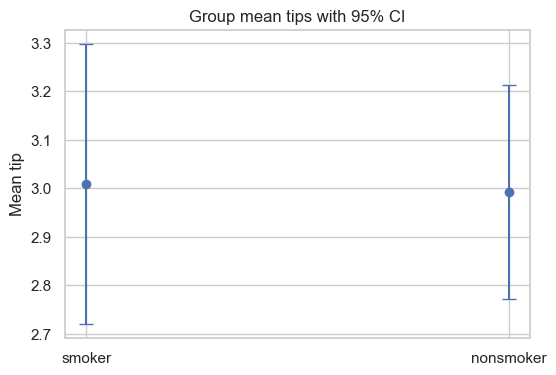

In [13]:
def mean_ci_plot(groups_dict, alpha=0.05):
    plt.figure(figsize=(6,4))
    means, lowers, uppers, labels = [], [], [], []
    for label, data in groups_dict.items():
        m, lo, hi = t_confidence_interval(data, confidence=1-alpha)
        means.append(m); lowers.append(lo); uppers.append(hi); labels.append(label)
    x = np.arange(len(labels))
    plt.errorbar(x, means, yerr=[np.array(means)-np.array(lowers), np.array(uppers)-np.array(means)],
                 fmt='o', capsize=5)
    plt.xticks(x, labels)
    plt.ylabel("Mean tip")
    plt.title("Group mean tips with 95% CI")
    plt.show()

groups_dict = {"smoker": tips_smoker.values, "nonsmoker": tips_nonsmoker.values}
mean_ci_plot(groups_dict)